#Import library dan data

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from datetime import datetime

In [ ]:
!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
shopping = pd.read_csv('https://raw.githubusercontent.com/LuSteps/CS_SM4/main/online_shoppers_intention.csv')
shopping.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


# Preprocessing data

In [ ]:
# Check for null values in data
nullcount = shopping.isnull().sum()
print('Jumlah data null:', nullcount.sum())

Jumlah data null: 0


<bound method Series.sort_values of Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
dtype: float64>


<Axes: >

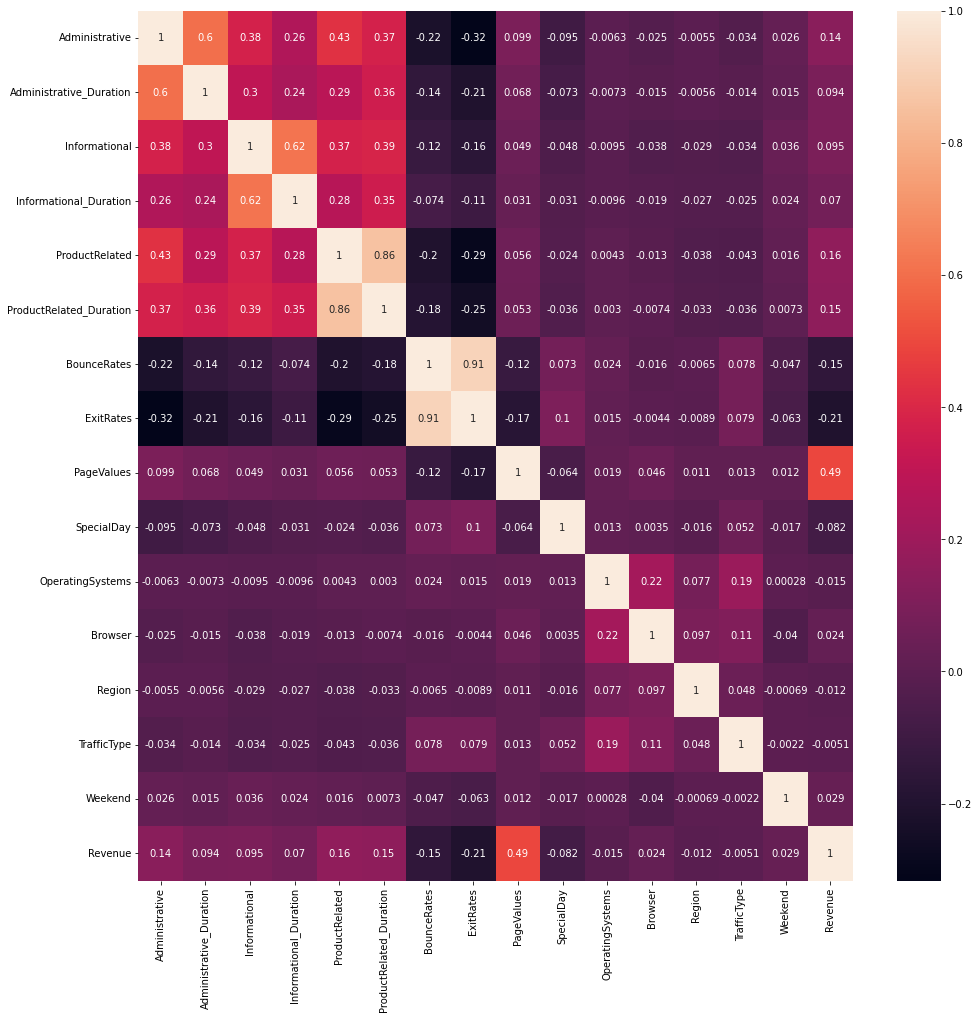

In [ ]:
# Cek relasi
Var_Corr = shopping.corr()

corevenue = shopping.corrwith(shopping['Revenue'], method='pearson')
print(corevenue.sort_values)

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [ ]:
# Removing unneccessary columns from data: shopping_clean
shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [ ]:
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)
revenue_temp = shopping_clean['Revenue']


shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType', 'Revenue'], axis=1)
shopping_clean_merged = pd.concat([shopping_clean_merged, revenue_temp], axis=1)

shopping_clean_merged.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Visitor_Type_Other,Visitor_Type_Returning_Visitor,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,0,1,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,0,1,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,0,1,False


In [ ]:
# Split train and test data

X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

# Gaussian Naive Bayes Classifier

In [ ]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB()

before = datetime.now()
gnb.fit(X_train, y_train)
after = datetime.now()

print('Waktu: ', after-before)


# Make prediction using our test data and model
y_pred = gnb.predict(X_test)


# Comparing our prediction to response values
print("Akurasi Gaussian Naive Bayes: ", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Waktu:  0:00:00.008307
Akurasi Gaussian Naive Bayes:  84.63


# Random Forest Classifier

In [ ]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=10, random_state=2, n_estimators=10)

before = datetime.now()
rfc.fit(X_train, y_train)
after = datetime.now()

print('Waktu: ', after-before)
# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]


# Comparing our prediciton to response values
print('Akurasi Random Forest Classifier: ', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Waktu:  0:00:00.120851
Akurasi Random Forest Classifier:  89.17


# Extra Trees Classifier

In [ ]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=10) #coba parameternya yang random state ga usah,catet 1 1 di excel bandingin akurasi, bandingin knn n dec tree salah satu klo performa lebih gede

before = datetime.now()
etc.fit(X_train, y_train)
after = datetime.now()

print('Waktu: ', after-before)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Akurasi Extra Trees Classifier: ', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Waktu:  0:00:00.092134
Akurasi Extra Trees Classifier:  88.89


# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

before = datetime.now()
knn.fit(X_train, y_train)
after = datetime.now()

print('Waktu: ', after-before)

pred = knn.predict(X_test)

print("Akurasi KNN Classifier: ", round(metrics.accuracy_score(y_test, pred)*100, 2))

Waktu:  0:00:00.023382
Akurasi KNN Classifier:  88.08


# ANN

In [ ]:
shopping_clean_merged['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
le = LabelEncoder()
shopping_clean_merged['Revenue'] = le.fit_transform(shopping_clean_merged.Revenue)
shopping_clean_merged.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Visitor_Type_Other,Visitor_Type_Returning_Visitor,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,0,1,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,0,1,0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,0,1,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

tf.config.run_functions_eagerly(True)

def build_model():
  inputs = tf.keras.layers.Input(shape=12) #shape menyesuaikan jumlah feature
  hidden_layer = tf.keras.layers.Dense(32)(inputs) #jumlah hidden layer
  hidden_layer = tf.keras.layers.Dense(32)(hidden_layer) #ditumpuk disini
  outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer) #pake function aktivasi sigmoid

  model = tf.keras.models.Model(inputs, outputs)
  lr = 1e-3
  model.compile(loss='mae', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                416       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(shopping_clean_merged[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay', 'Visitor_Type_Other','Visitor_Type_Returning_Visitor']].values,
          shopping_clean_merged['Revenue'].values, epochs=10, batch_size=32, verbose='auto')

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


386/386 [==============================] - 19s 48ms/step - loss: 0.1559 - accuracy: 0.8452
Epoch 2/10
386/386 [==============================] - 25s 65ms/step - loss: 0.1548 - accuracy: 0.8453
Epoch 3/10
386/386 [==============================] - 12s 30ms/step - loss: 0.1548 - accuracy: 0.8453
Epoch 4/10
386/386 [==============================] - 12s 31ms/step - loss: 0.1548 - accuracy: 0.8453
Epoch 5/10
386/386 [==============================] - 12s 31ms/step - loss: 0.1547 - accuracy: 0.8453
Epoch 6/10
386/386 [==============================] - 13s 33ms/step - loss: 0.1547 - accuracy: 0.8453
Epoch 7/10
386/386 [==============================] - 18s 46ms/step - loss: 0.1547 - accuracy: 0.8453
Epoch 8/10
386/386 [==============================] - 12s 32ms/step - loss: 0.1547 - accuracy: 0.8453
Epoch 9/10
386/386 [==============================] - 12s 30ms/step - loss: 0.1547 - accuracy: 0.8453
Epoch 10/10
386/386 [==============================] - 14s 36ms/step - loss: 0.1547 - accurac

In [ ]:
pred = model.predict(shopping_clean_merged[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay', 'Visitor_Type_Other','Visitor_Type_Returning_Visitor']].values)
print(pred)

 39/386 [==>...........................] - ETA: 0s

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


386/386 [==============================] - 1s 3ms/step
[[1.3253477e-06]
 [4.7602792e-23]
 [1.3253477e-06]
 ...
 [0.0000000e+00]
 [0.0000000e+00]
 [6.4218209e-14]]


In [ ]:
print("Akurasi ANN Classifier: ", round(metrics.accuracy_score(shopping_clean_merged['Revenue'], pred.astype(int))*100, 2))

Akurasi ANN Classifier:  84.53


In [ ]:
indeks = 101
print(f"Asli: {le.inverse_transform(np.array(shopping_clean_merged.Revenue.iloc[indeks]).reshape(-1,1))}")
print(f"Pred: {le.inverse_transform(np.round(pred[indeks].astype(int)))}")

Asli: [ True]
Pred: [False]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Junkyard

In [ ]:
# # print
# #numer = 1
# #for x in y_pred_rfc:
#   status = 'Beli'

#   if x == False:
#     status = 'Lihat-lihat'
#   else:
#     status = 'Membeli'

#   print('Customer ', numer, ": ", status)


#   numer += 1
#   if numer == 11:
#     break


# plt_2 = skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
# print(classification_report(y_test, pred))


# # Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
# roc_value = roc_auc_score(y_test, y_prob_rfc)
# print('Nilai AUC: ', round(roc_value,2), '\n')

# fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
# roc_auc = metrics.auc(fpr, tpr)

# # Plotting ROC Curve
# plt.title('ROC')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()